# Train and test the model

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt 
import yfinance
from datetime import datetime , timedelta
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\hoang\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Training
Training  of the model on simulated data

In [4]:
img_width, img_height = 420, 420

train_data_dir = 'train'
validation_data_dir = 'validation'
nb_train_samples = 399
nb_validation_samples =398
epochs = 10
batch_size = 32

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.add(Activation('sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


train_datagen = ImageDataGenerator(
    rescale=1. / 420)


test_datagen = ImageDataGenerator(rescale=1. / 420)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 418, 418, 32)      896       
                                                                 
 activation (Activation)     (None, 418, 418, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 209, 209, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 207, 207, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 207, 207, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 103, 103, 32)     0         
 2D)                                                    

In [5]:
model.fit_generator(
    train_generator,
    # steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    # validation_steps=nb_validation_samples // batch_size
    )

model.save_weights('first_try.h5')

C:\Users\hoang\AppData\Local\Temp/ipykernel_10596/7499497.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
16/16 [==============================] - 132s 8s/step - loss: 3.8296 - accuracy: 0.5960 - val_loss: 0.6999 - val_accuracy: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 153s 10s/step - loss: 0.6969 - accuracy: 0.5660 - val_loss: 0.7896 - val_accuracy: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 146s 9s/step - loss: 0.6809 - accuracy: 0.6220 - val_loss: 0.8682 - val_accuracy: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 144s 9s/step - loss: 0.6870 - accuracy: 0.5980 - val_loss: 0.9893 - val_accuracy: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 133s 8s/step - loss: 0.7397 - accuracy: 0.5640 - val_loss: 0.8122 - val_accuracy: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 135s 8s/step - loss: 0.6768 - accuracy: 0.6260 - val_loss: 0.9008 - val_accuracy: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 118s 7s/step - loss: 0.6503 - accuracy: 0.6420 - val_loss: 0.4782 - val_accur

In [6]:
model.save('Model.h5')

In [3]:
model = keras.models.load_model('Model.h5')

# Test
Test of the model on real data

In [4]:
img_width, img_height = 420, 420
test_dir = 'test'
test_datagen = ImageDataGenerator(rescale=1./img_width)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_width, img_width),
        color_mode="rgb",
        shuffle = False,
        class_mode='binary',
        batch_size=1)


filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator,steps = nb_samples)
predict2=[]
for a in predict:
    predict2.append(float(a.round(3)))

filenames=test_generator.filenames

results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predict2})

results.to_csv("resultsForex.csv",index=False)
donnee=pd.read_csv('resultsForex.csv')

for i in range(0,len(donnee.Filename)):
    donnee.iloc[i,0]=donnee.iloc[i,0].split('\\')[1].split('_')[0]


Found 1909 images belonging to 1 classes.


C:\Users\hoang\AppData\Local\Temp/ipykernel_10456/3180531842.py:17: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator,steps = nb_samples)


Dates extraction where a head and shoulder pattern is detected

In [8]:

len(donnee)

1909

In [25]:
date_bonne=[]
j=0
while (j < len(donnee)):
    if donnee.iloc[j,1] > 0.8:
        date_bonne.append(donnee.iloc[j,0])

        if ((len(donnee) - j ) < 30):
            date_bonne.append(donnee.iloc[(j),0])
            j=len(donnee)
            break
        else:
            j=j+30
            date_bonne.append(donnee.iloc[(j),0])
            
    j=j+1
    


a=0
lst_dict = []

while (a < len(date_bonne)):
    lst_dict.append({'x0':date_bonne[a],'x1':date_bonne[a+1],'opacity':0.2, 'type':'rect','fillcolor':'#d3d3d3', 'y0':0, 'y1':1, 'xref':'x', 'yref':'paper','line_width':1})
    a=a+2


A plot of one head and shoulder pattern detection

Pattern confirmation

In [26]:
ticker = 'AAPL'
endDate = pd.to_datetime('today')
startDate = endDate - timedelta(days = 300)

df = yfinance.download(ticker , startDate , endDate , interval= '1h')
# df = get_stock_dataframe(ticker , startDate , endDate , i)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2021-05-04 09:30:00-04:00,131.375000,131.489899,127.839996,128.300003,128.300003,37576043
2021-05-04 10:30:00-04:00,128.304993,128.440002,127.339996,127.550003,127.550003,18673080
2021-05-04 11:30:00-04:00,127.550003,127.675003,126.730003,127.434998,127.434998,18811837
2021-05-04 12:30:00-04:00,127.434998,127.440002,126.699997,127.054604,127.054604,12994472
2021-05-04 13:30:00-04:00,127.050003,127.500000,126.760002,127.198502,127.198502,11474225
...,...,...,...,...,...,...
2022-02-25 12:30:00-05:00,164.300003,164.820007,163.479996,164.485001,164.485001,9663934
2022-02-25 13:30:00-05:00,164.490005,165.009995,164.139999,164.779999,164.779999,8439502
2022-02-25 14:30:00-05:00,164.779999,165.000000,163.979996,164.675003,164.675003,10236795
2022-02-25 15:30:00-05:00,164.679993,165.119995,164.449997,164.869995,164.869995,11145931


In [11]:
df.index = pd.to_datetime(df.index)

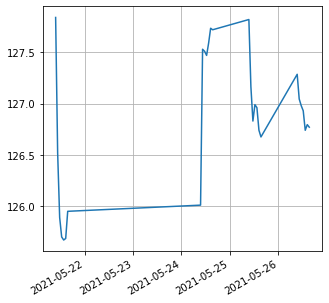

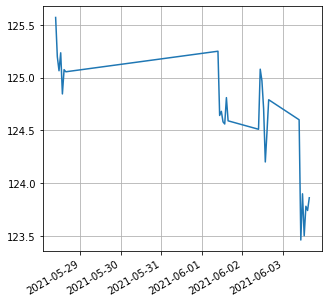

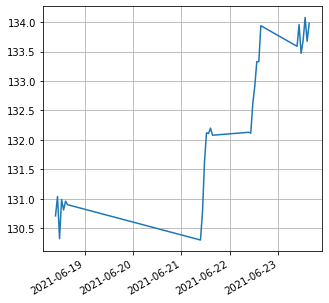

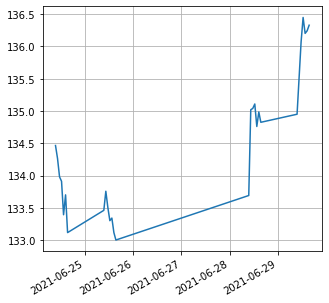

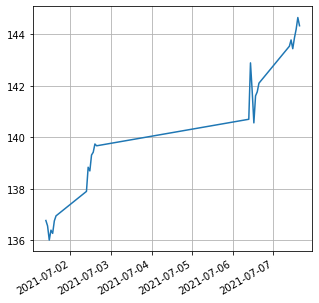

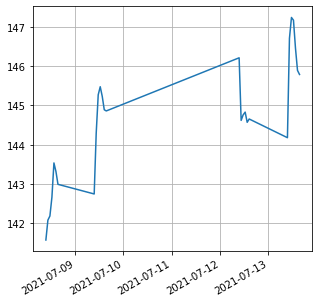

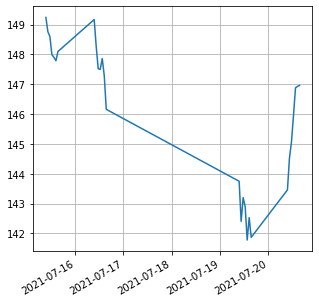

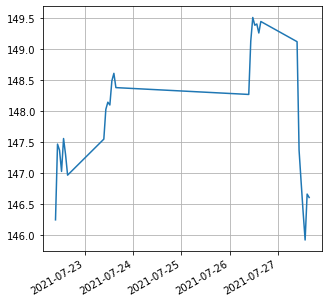

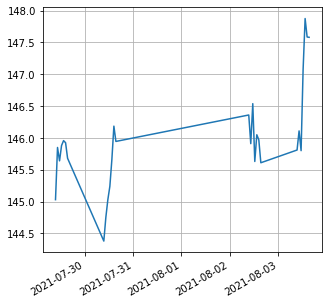

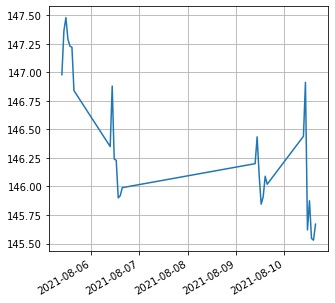

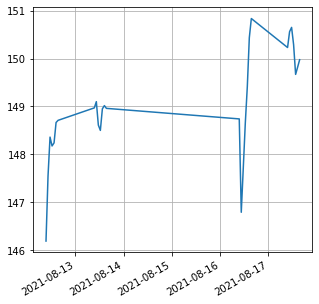

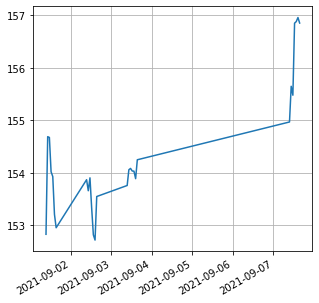

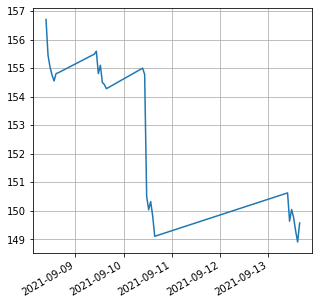

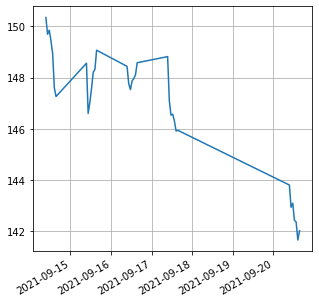

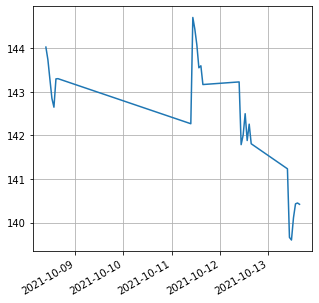

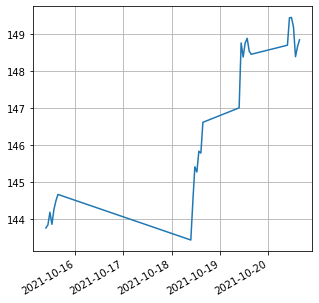

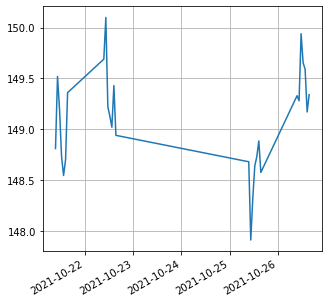

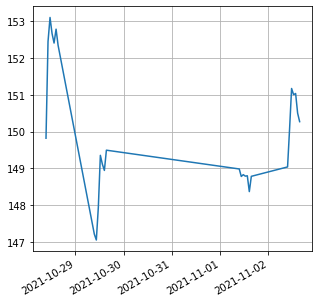

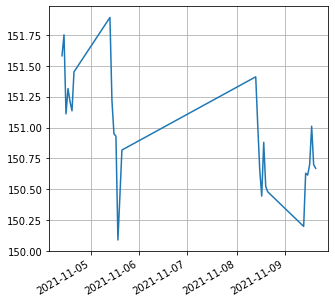

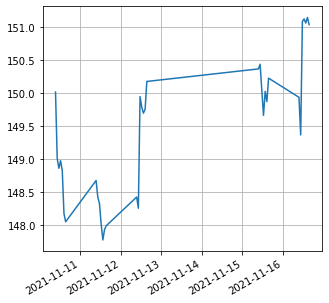

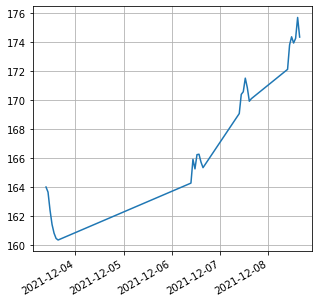

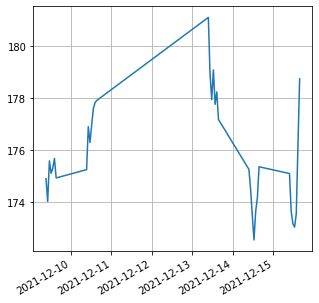

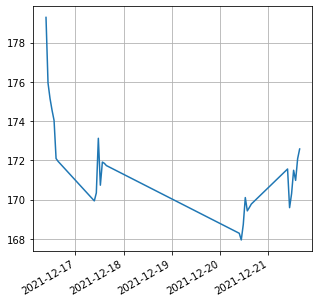

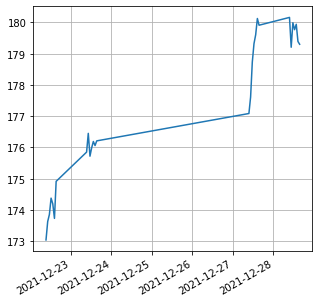

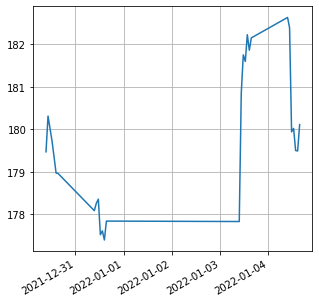

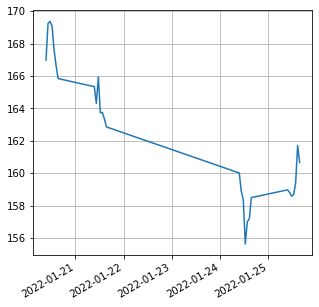

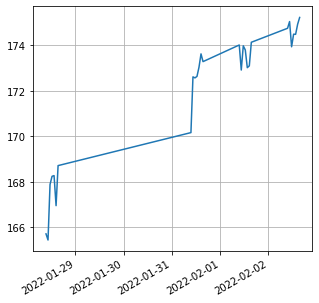

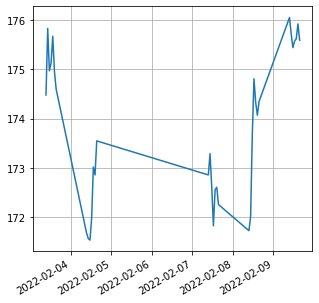

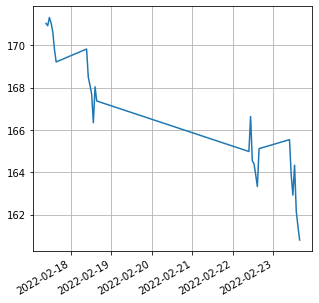

In [54]:
a=0

pattern_asc_price = []
pattern_des_price = []

while (a < len(date_bonne)):
    time = date_bonne[a].split('-')
    start = time[0] + '-' + time[1] + '-' + time[2]
    end = time[4] + '-' + time[5] + '-' + time[6]
    
    start = pd.to_datetime(start).tz_localize('America/New_York')
    end = pd.to_datetime(end).tz_localize('America/New_York')
    donnee_version = df.loc[(df.index >= pd.to_datetime(start)) & (df.index <= pd.to_datetime(end))]
    
    if ( (len(donnee_version)  != 0)
            & ( (df.iloc[a]['Open'] < df.iloc[a+3]['Open']) | (df.iloc[a]['Open'] < df.iloc[a+6]['Open']) )):
        pylab.rcParams['figure.figsize'] = (5,5)   # Change the size of plots
        donnee_version["Open"].plot(grid = True) # P
        pattern_asc_price.append(a)
        plt.show()
        a=a+1
    elif len(donnee_version):
        
        pattern_des_price.append(a)
        a=a+1

    a=a+1
    

In [55]:
print(len(pattern_asc_price))
print(len(pattern_des_price))

29
16


In [ ]:
# date_bonne=['2017-09-28H16', '2017-10-02H16']
# a=0
# while (a < 1):
#     print(date_bonne[a])
#     donnee_version=donnee2.loc[(donnee2.index >= date_bonne[a]) & (donnee2.index<= date_bonne[(a+1)])]
#     pylab.rcParams['figure.figsize'] = (5,5)   # Change the size of plots
#     donnee_version["openbid"].plot(grid = True) # P
#     plt.show()
#     a=a+2